# Exercise OpenCV

# 1. Open and display the image 'xfiles.jpg'

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

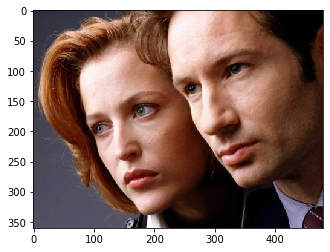

In [2]:
img = cv2.imread('./data_files/xfiles.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 2. Highlight the faces in the image by drawing a circle around each face

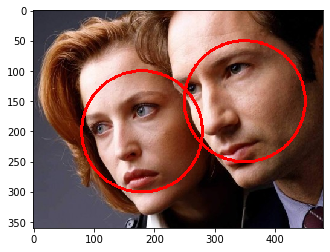

In [3]:
img = cv2.imread('./data_files/xfiles.jpg', cv2.IMREAD_COLOR)
cv2.circle(img, (180,200), 100, (0,0,255), 4)
cv2.circle(img, (350,150), 100, (0,0,255), 4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3. Swap the faces in the image by modifying the pixels 

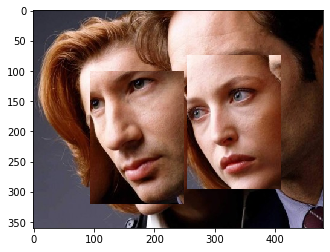

In [4]:
img = cv2.imread('./data_files/xfiles.jpg', cv2.IMREAD_COLOR)

faces = img.copy()
face_1 = faces[100:320, 95:250]
face_2 = faces[75:295, 255:410]

img[100:320, 95:250] = face_2
img[75:295, 255:410] = face_1

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 4. Blur the image through a convolution matrix of size (5 x 5)

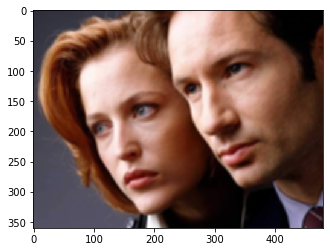

In [5]:
img = cv2.imread('./data_files/xfiles.jpg', cv2.IMREAD_COLOR)
blur = cv2.blur(img,(5,5))
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

# 5. Detect the edges in the image through canny edge detection

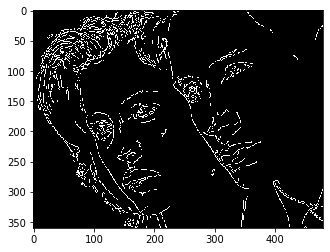

In [6]:
img = cv2.imread('./data_files/xfiles.jpg', cv2.IMREAD_COLOR)
threshold1 = 100
threshold2 = 200
canny = cv2.Canny(img, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

# 6.  Extract features of the image and display the keypoints

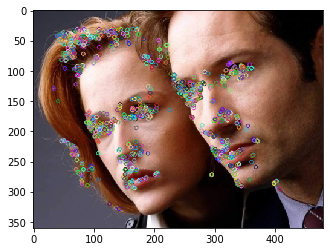

In [7]:
img = cv2.imread('./data_files/xfiles.jpg', cv2.IMREAD_COLOR)

orb = cv2.ORB_create(nfeatures=1500)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)
img_orb = cv2.drawKeypoints(img, keypoints_orb, None)
plt.imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))

# 7. Match the image with xfiles_crop.jpg and display the top 20 matches

Image 1 - 500 feature detected
Image 2 - 454 feature detected
500 matches


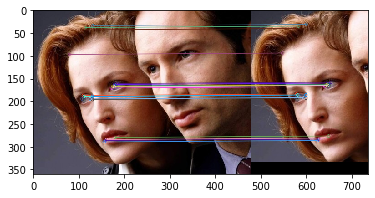

In [8]:
img1 = cv2.imread('./data_files/xfiles.jpg')
img2 = cv2.imread('./data_files/xfiles_crop.jpg')

orb = cv2.ORB_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)
print('%d matches' % len(matches))

matches = sorted(matches,key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20], None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

# 8. Detect the faces in the image Lenna.png

In [9]:
cascPath = './data_files/haarcascade_frontalface_alt.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

In [10]:
img = cv2.imread('./data_files/Lenna.png')

In [11]:
def detect_faces_show(fpath):
    img = cv2.imread(fpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    print("Found %d faces!" % len(faces))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Found 1 faces!


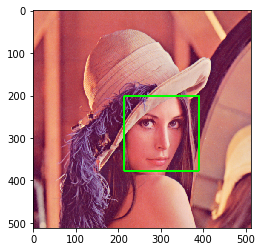

In [12]:
detect_faces_show('./data_files/Lenna.png')

# 9. Open your webcam and track your face

In [13]:
from IPython.display import display, HTML, clear_output

In [14]:
def open_video_controller(fpath, width = 480, height = 360):
    display(HTML(data='''<video alt="test" width="'''+ str(width) + '''" height="''' + str(height) + '''" controls>
            <source src="''' + fpath + '''" type="video/mp4" />
            </video>'''))

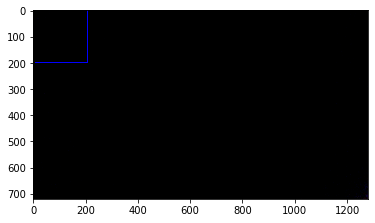

In [ ]:
tracker = cv2.TrackerMIL_create()

#vid_fpath = "data/videos/vtest.mp4"
vid = cv2.VideoCapture(0)

# Read first frame.
ok, frame = vid.read()
if not ok:
    print ('Cannot read video file')
    sys.exit()

bbox = (380, 100, 200, 200)

ok = tracker.init(frame, bbox)

while True:
    # Read a new frame
    ok, frame = vid.read()
    if not ok:
        break

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Draw bounding box
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0,0,255))

    plt.imshow(frame)
    plt.show()
    # Display the frame until new frame is available
    clear_output(wait=True)